# Exploração, Análise e Tratamento dos Dados

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/home/lucasqueiros/DataScience/Projeto-Classificacao/data/raw/data.csv', sep=',', encoding='utf-8')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Podemos observar que não existem dados faltantes, e exceto a variável resposta, todas as outras já estão com valores numéricos

Retirando as colunas não usadas

In [5]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Procurando valores duplicados

In [6]:
df.duplicated().sum()

0

In [7]:
colunas = df.columns

## Análise das Variáveis

In [8]:
for coluna in colunas:
    print(f'Value counts da coluna {coluna}:')
    print(df[coluna].value_counts())
    print()  # Adiciona uma linha em branco entre as saídas para melhor legibilidade

Value counts da coluna diagnosis:
B    357
M    212
Name: diagnosis, dtype: int64

Value counts da coluna radius_mean:
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64

Value counts da coluna texture_mean:
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: texture_mean, Length: 479, dtype: int64

Value counts da coluna perimeter_mean:
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: perimeter_mean, Length: 522, dtype: int64

Value counts da coluna area_mean:
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: area_mean, Length: 539, dtype: int64

Value counts da coluna smoothness_mean:
0.10070    5
0.11500    4
0.10540    4


Observações:
- Na coluna 'concavity_mean' possui 13 ocorrencias de média = 0
- O mesmo acontece em 'concave points_mean'


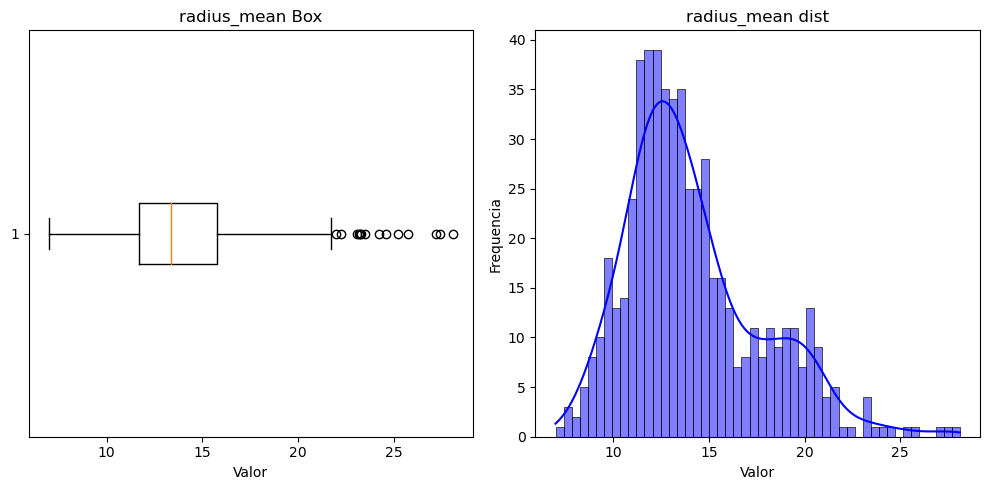

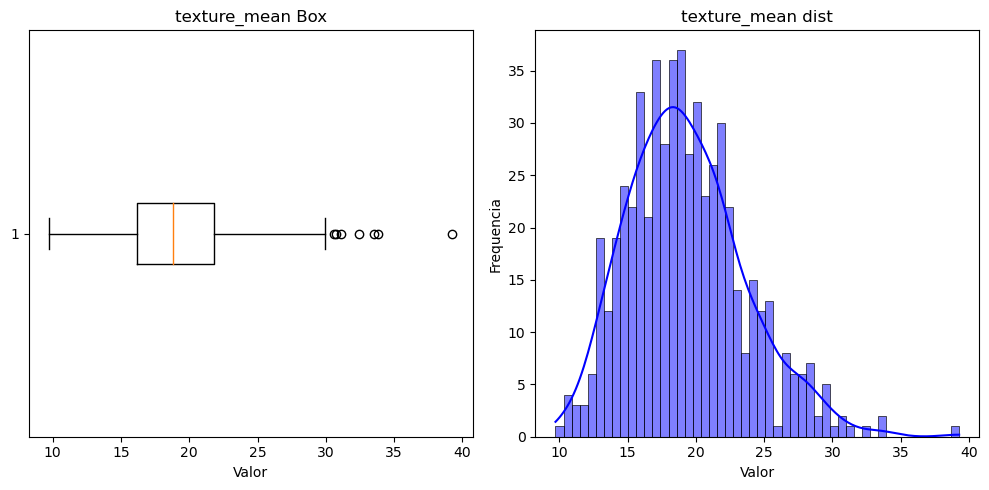

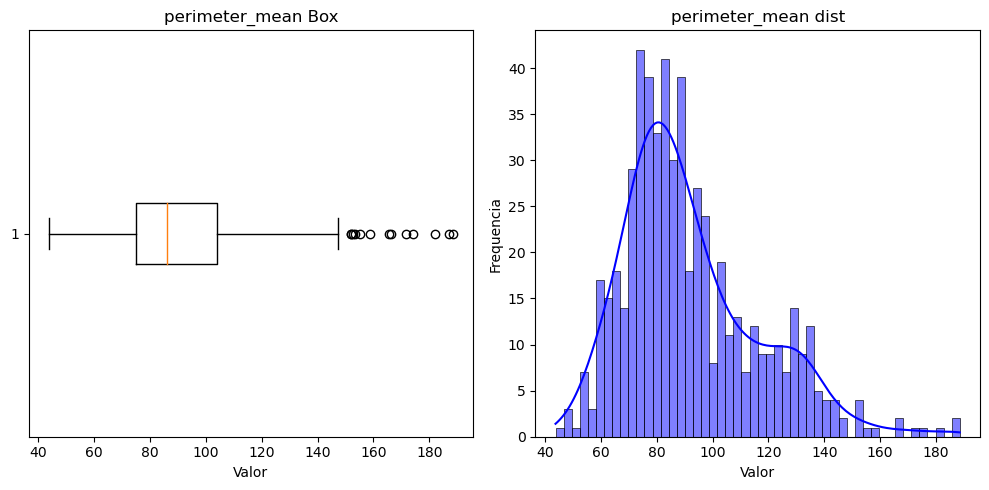

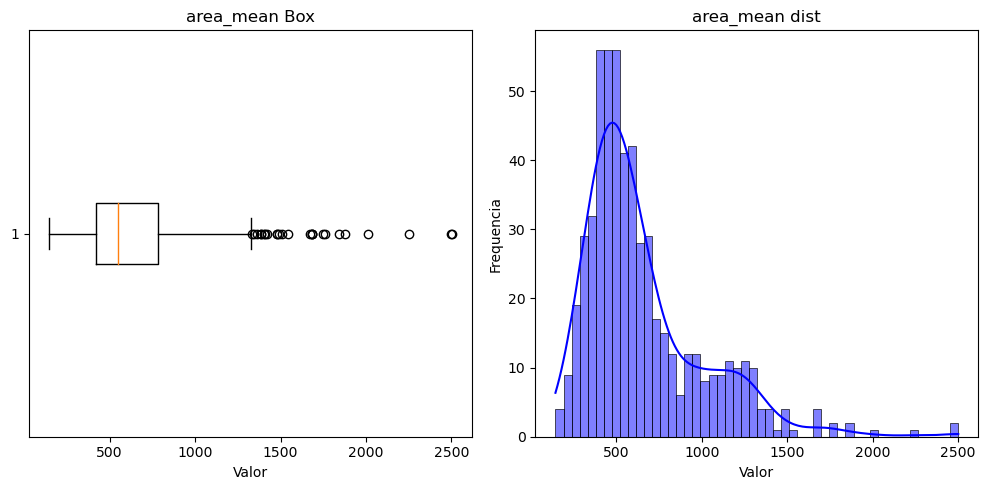

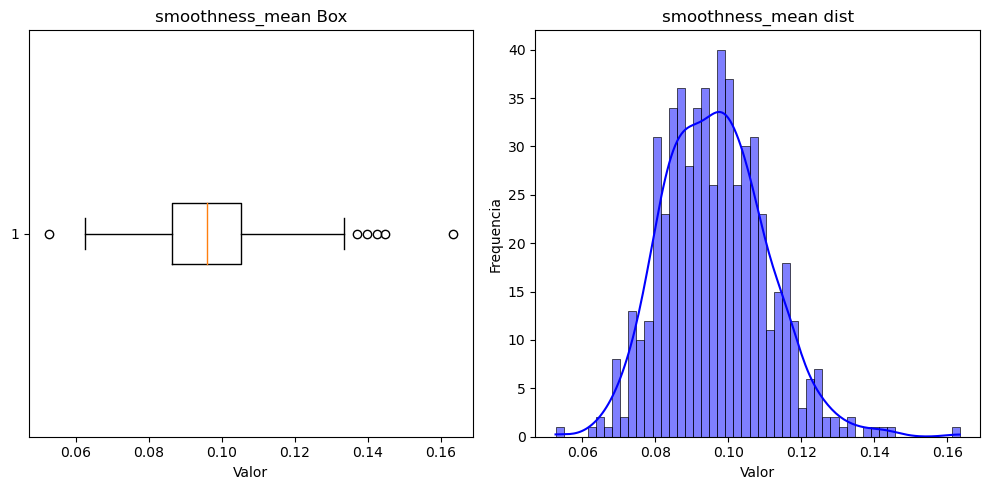

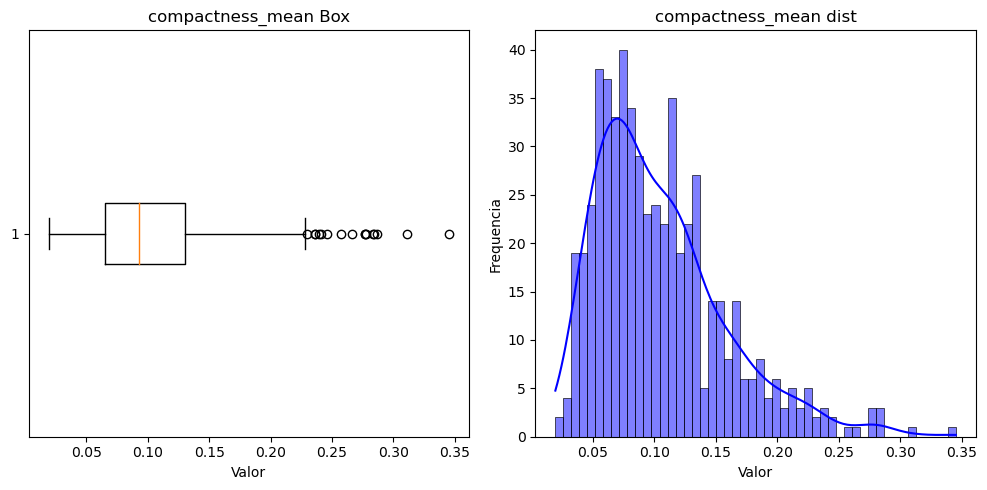

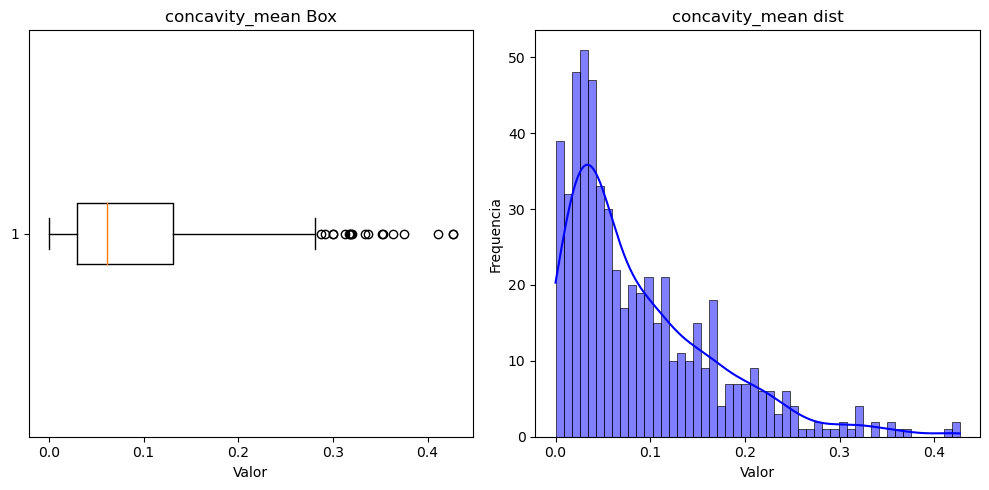

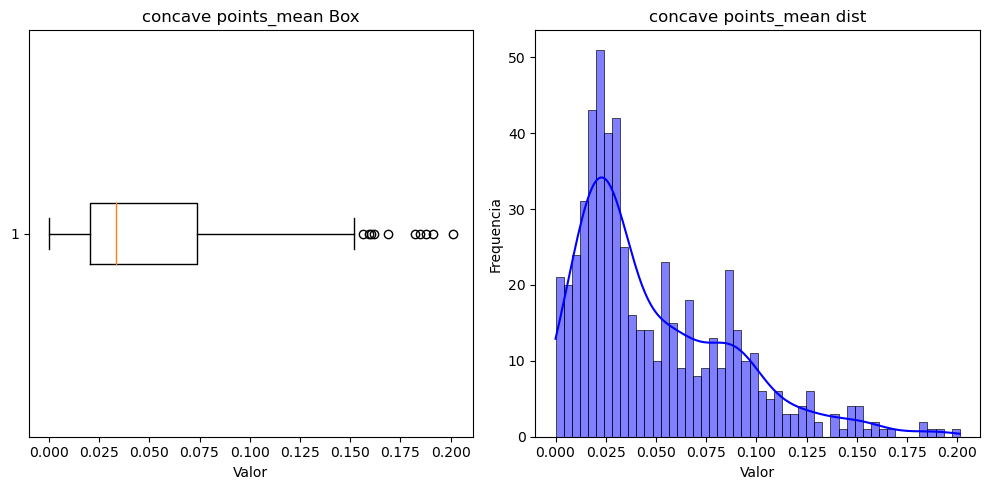

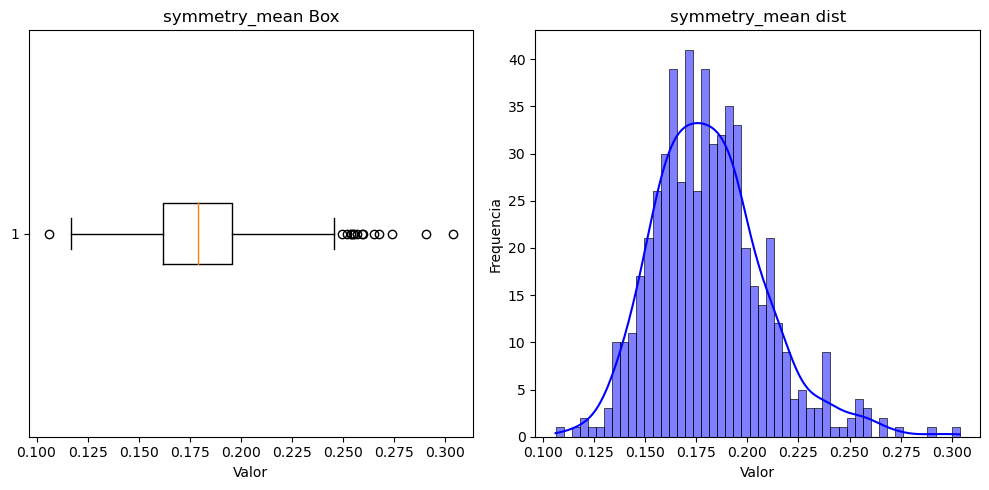

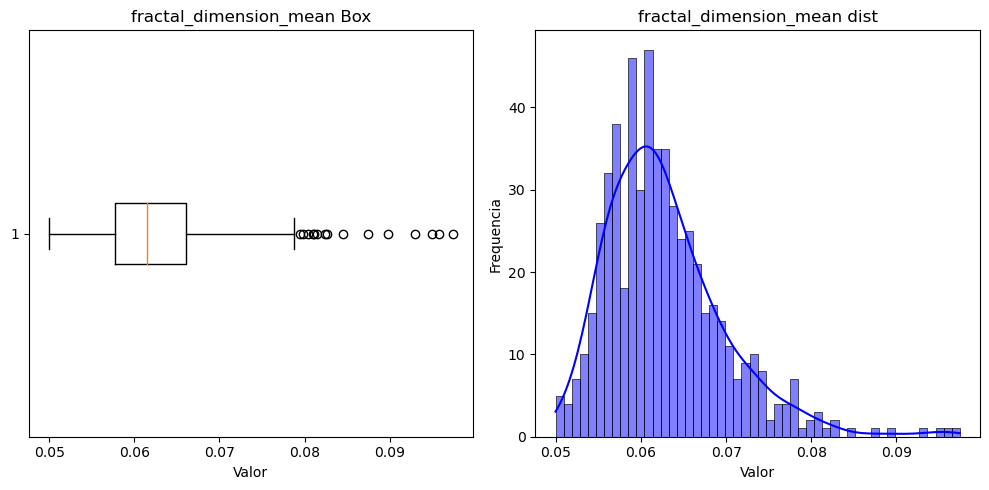

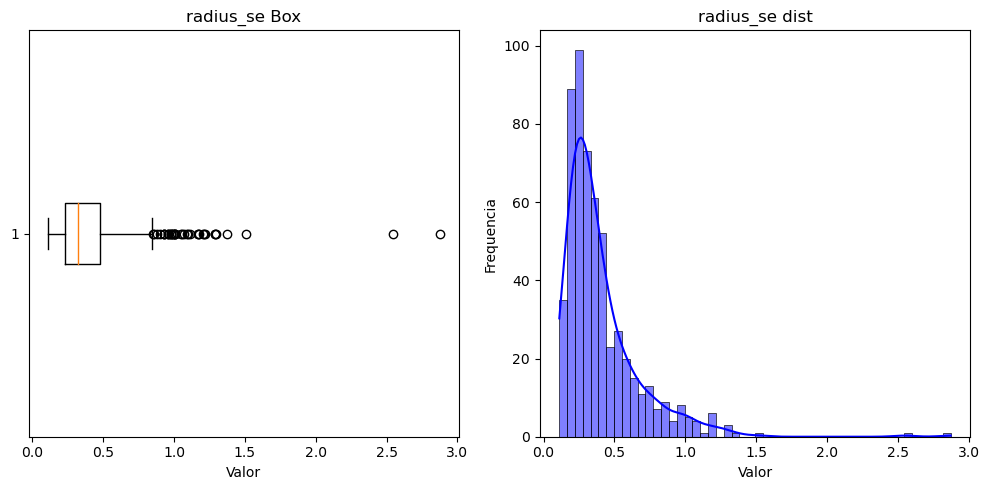

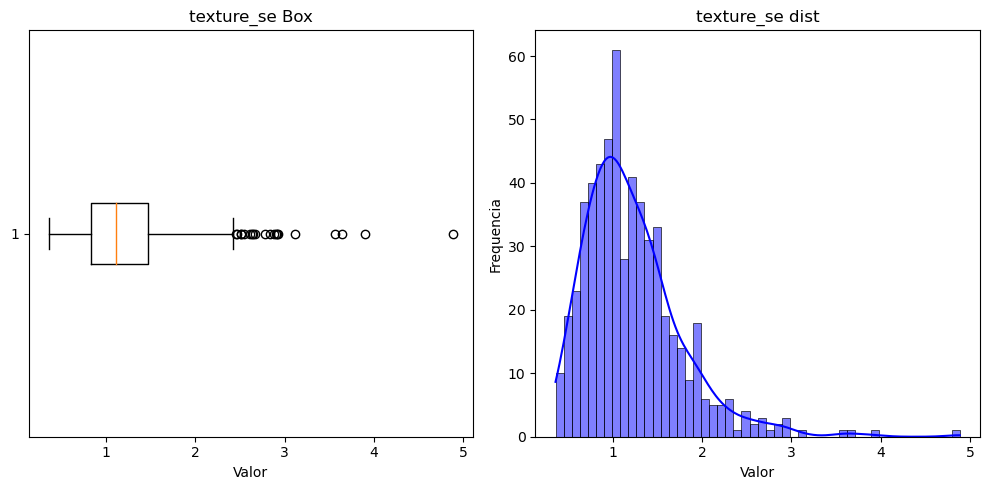

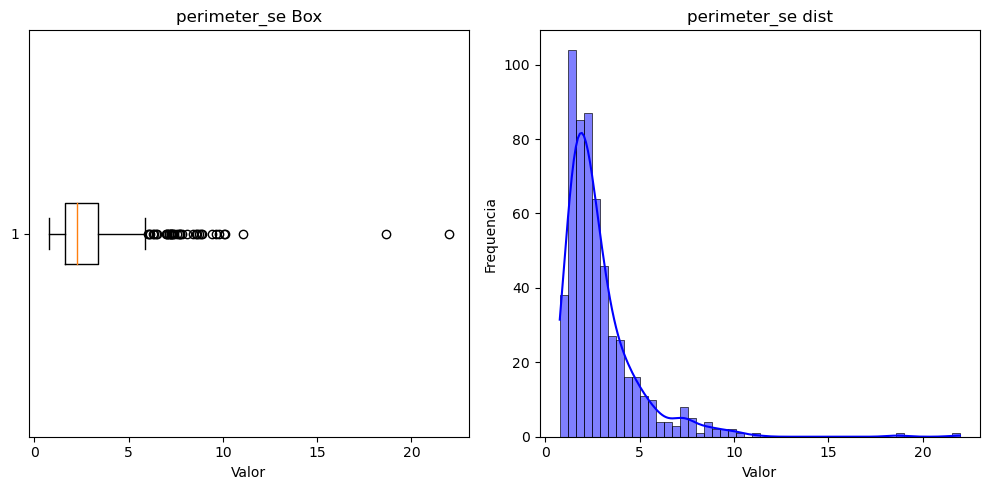

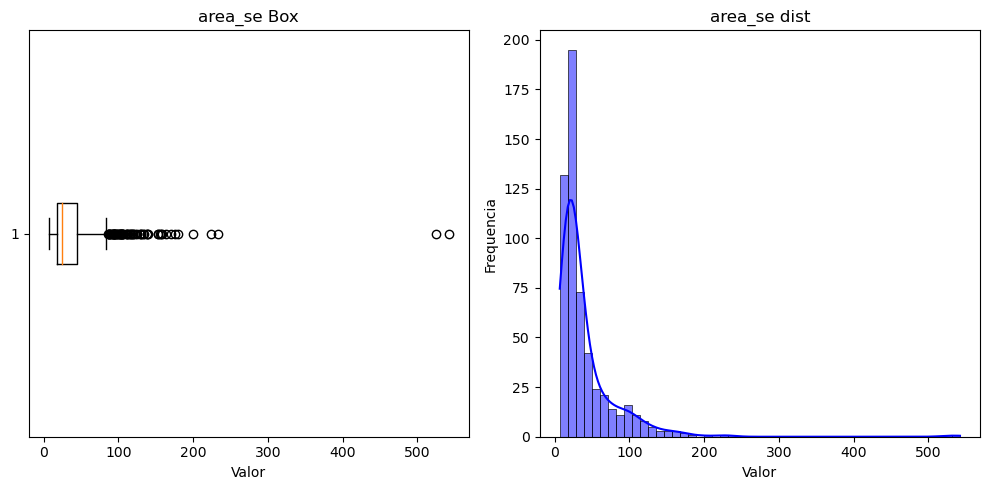

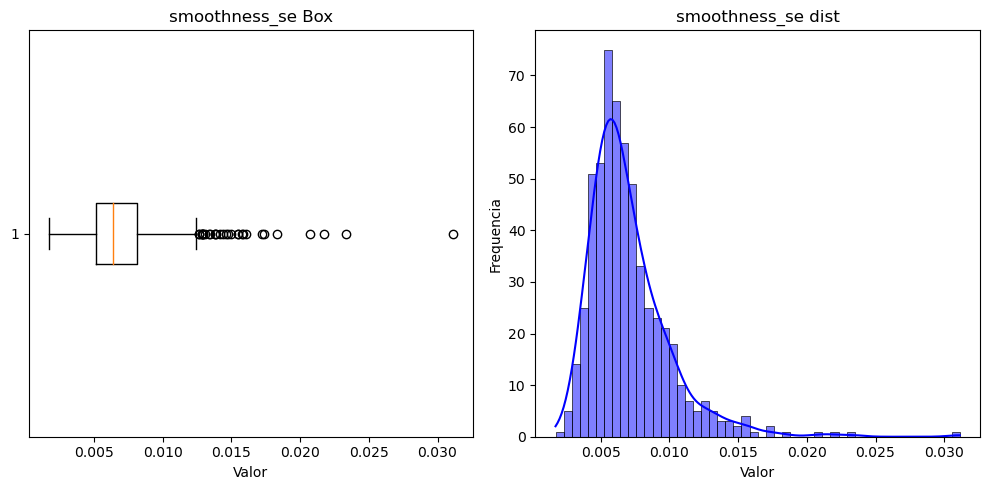

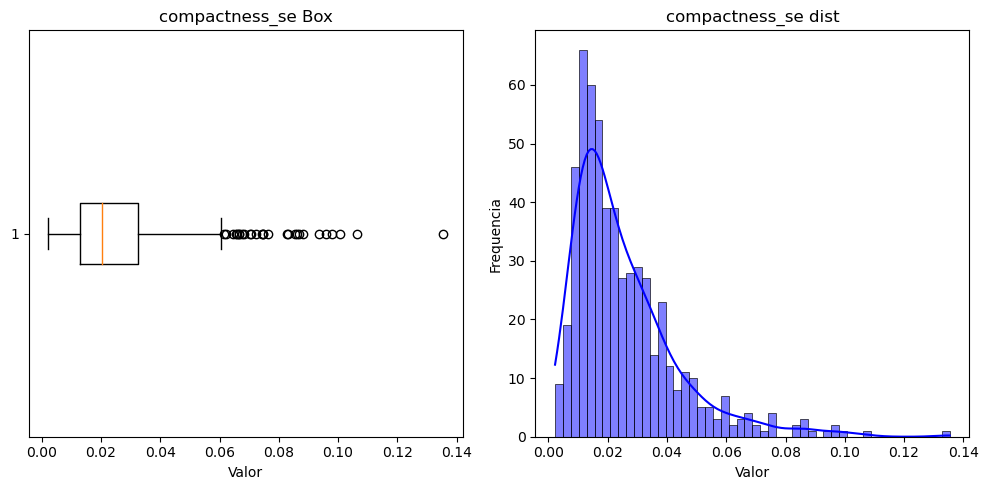

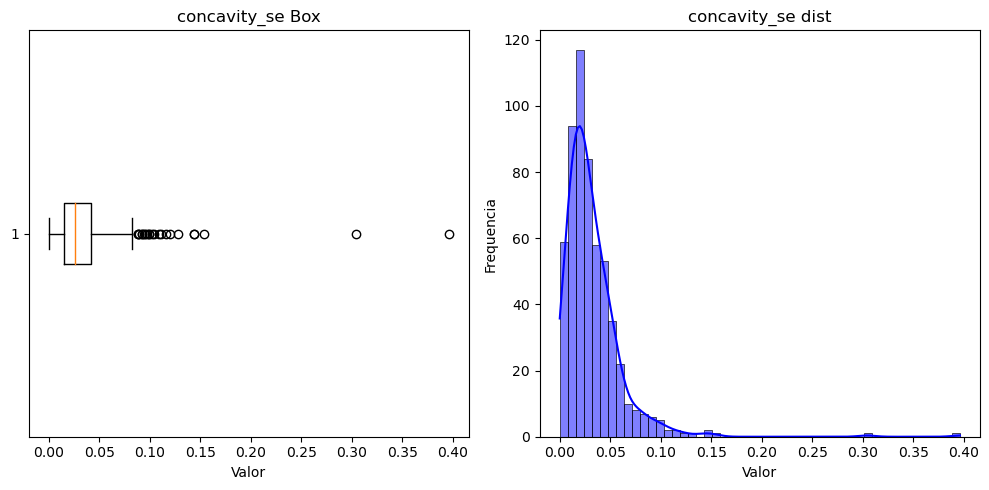

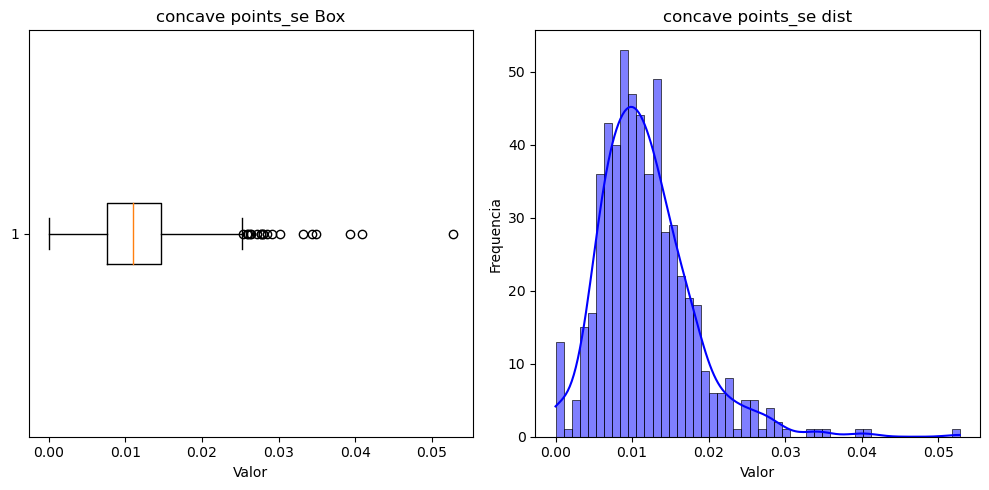

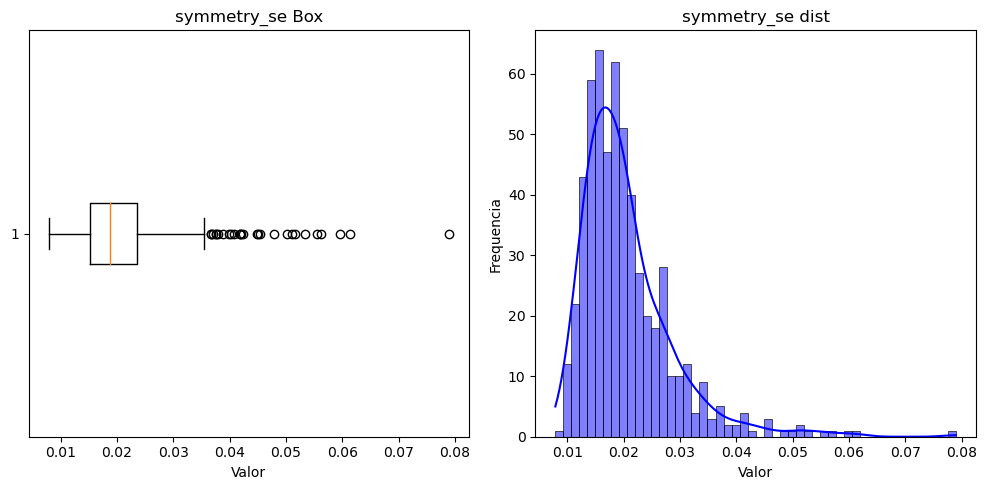

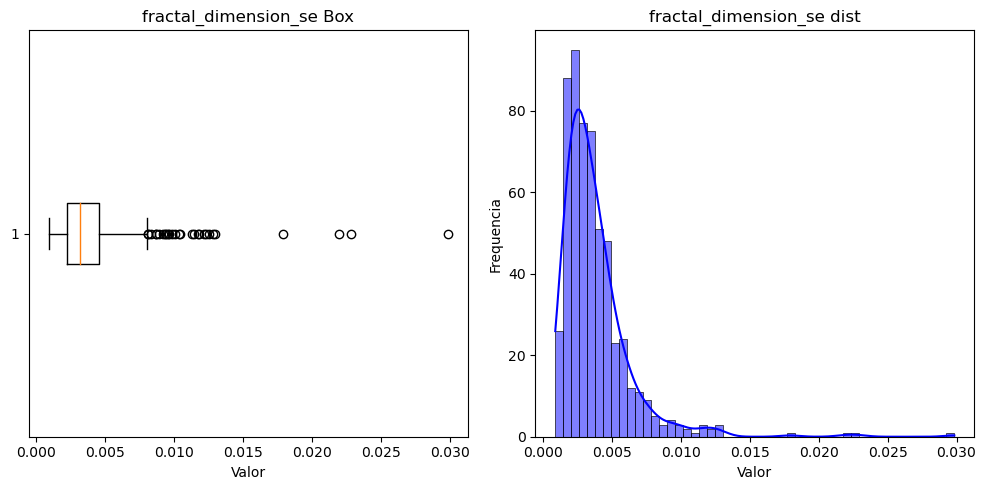

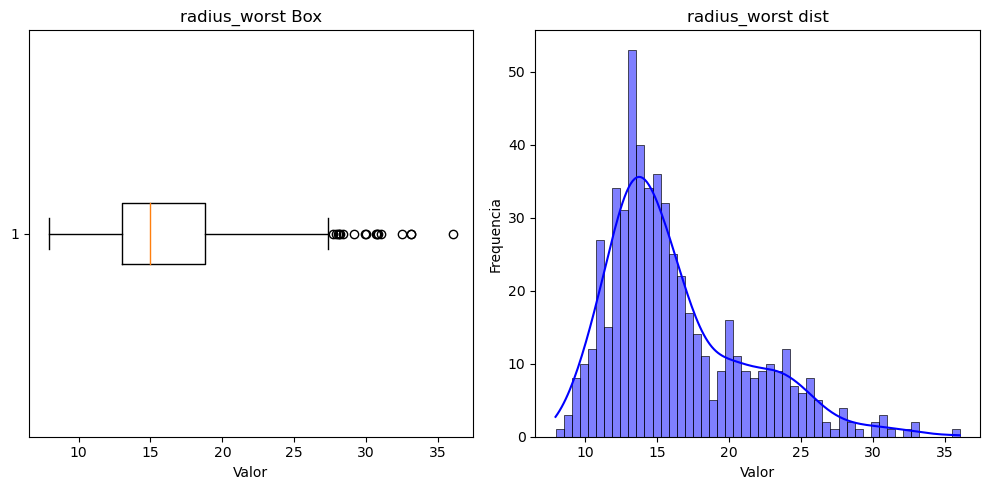

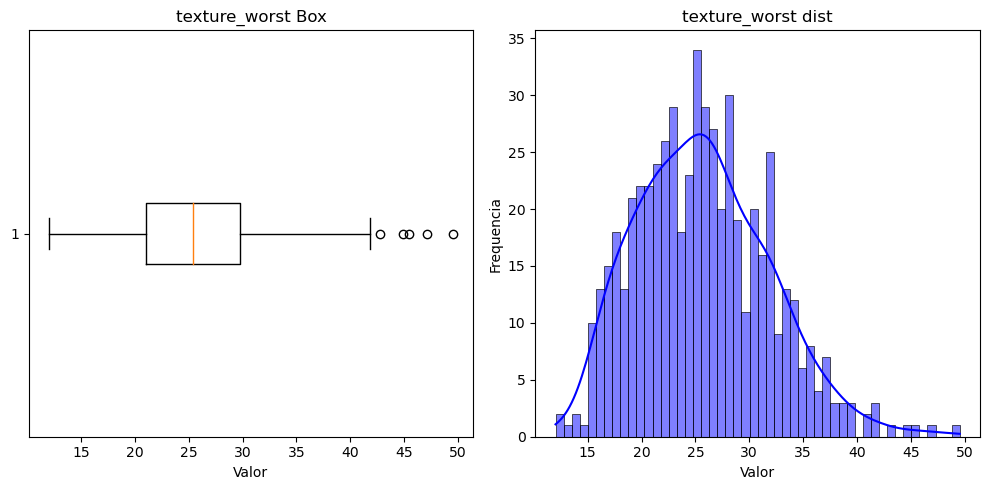

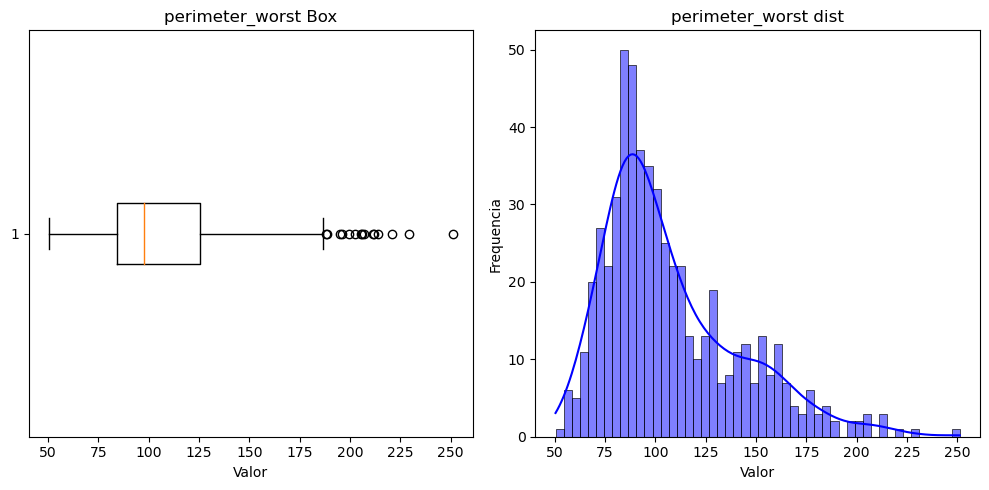

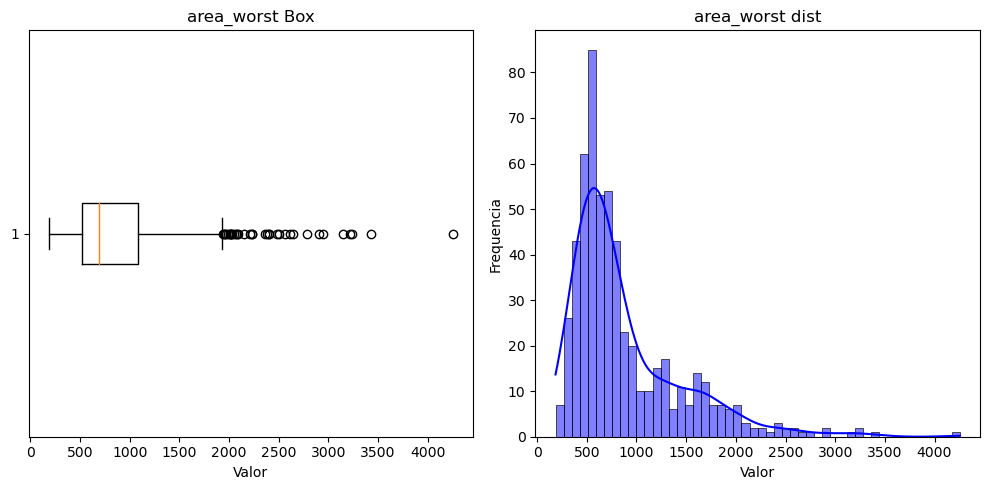

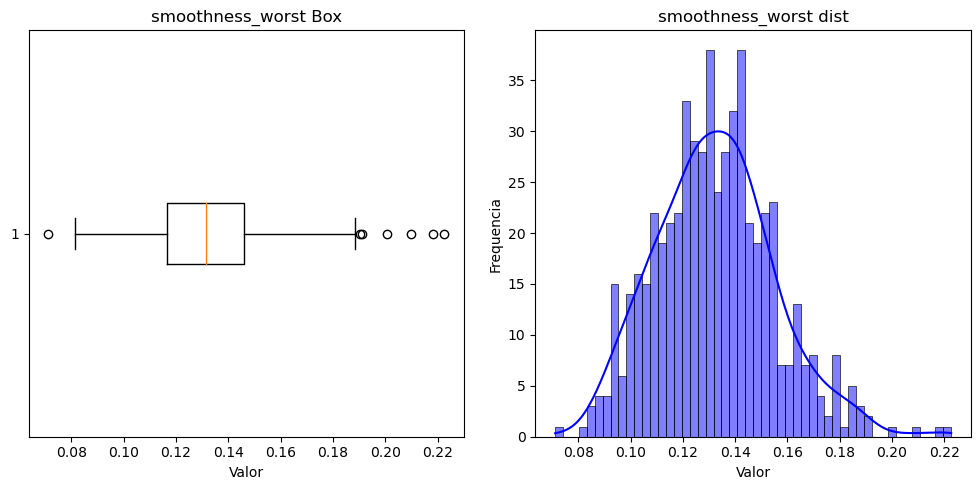

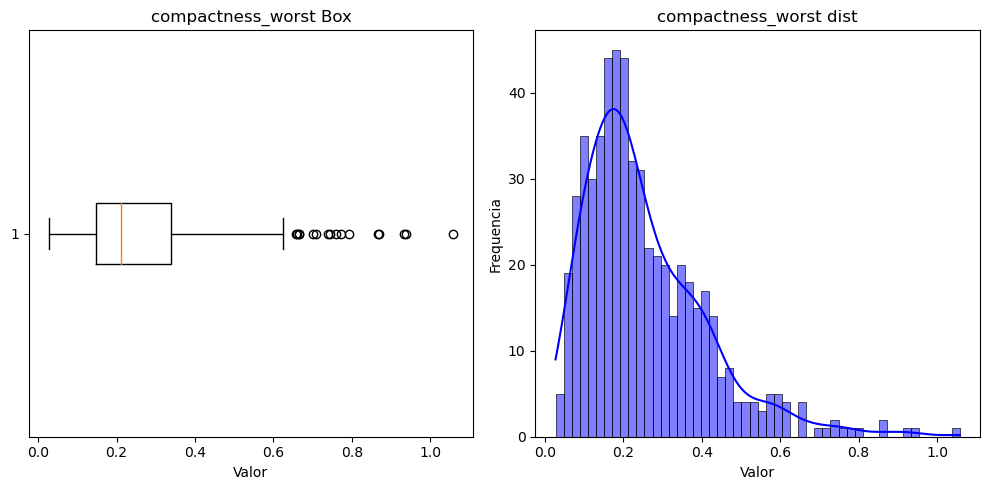

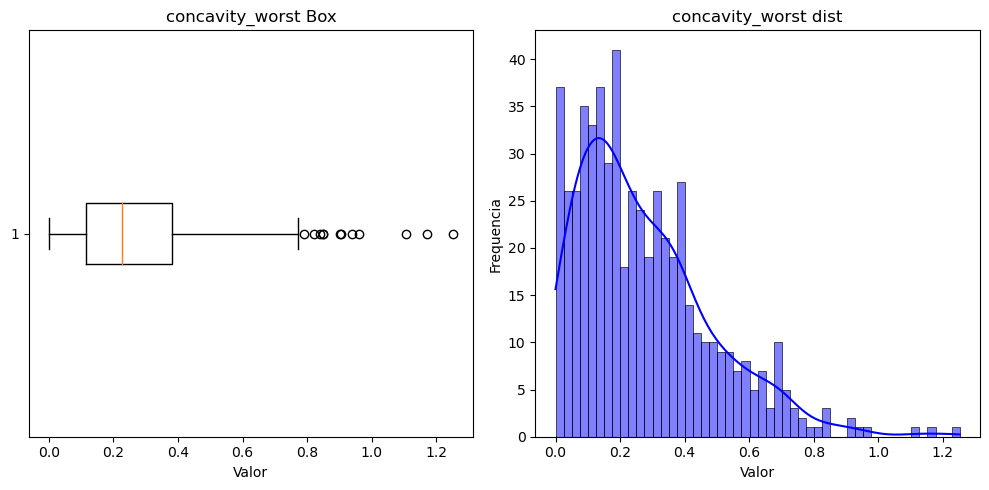

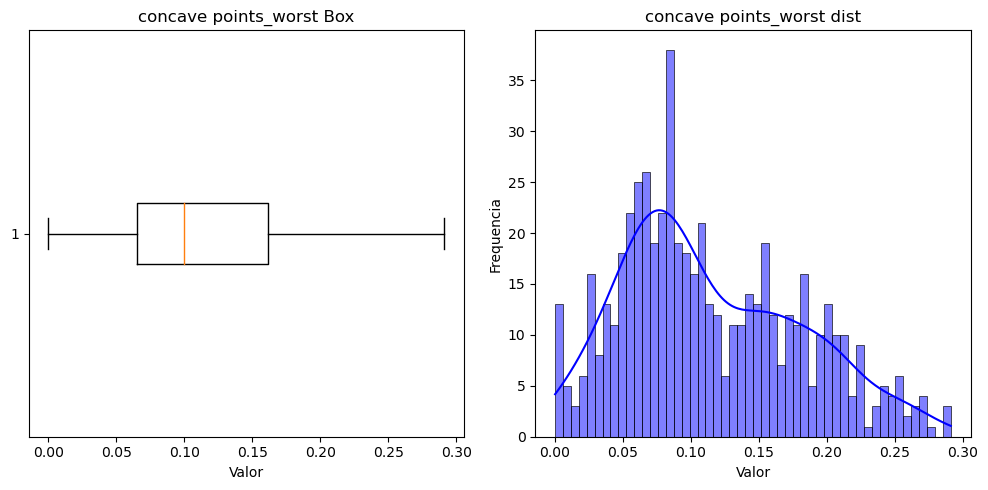

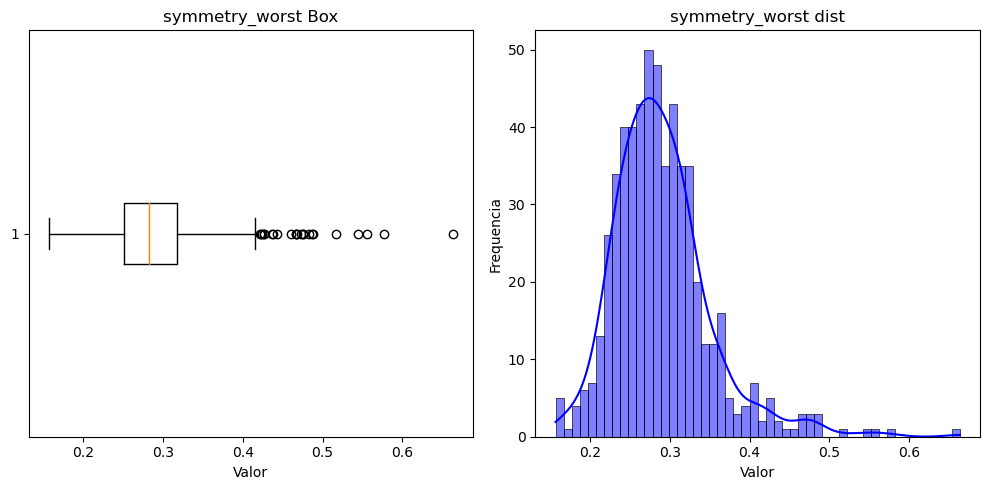

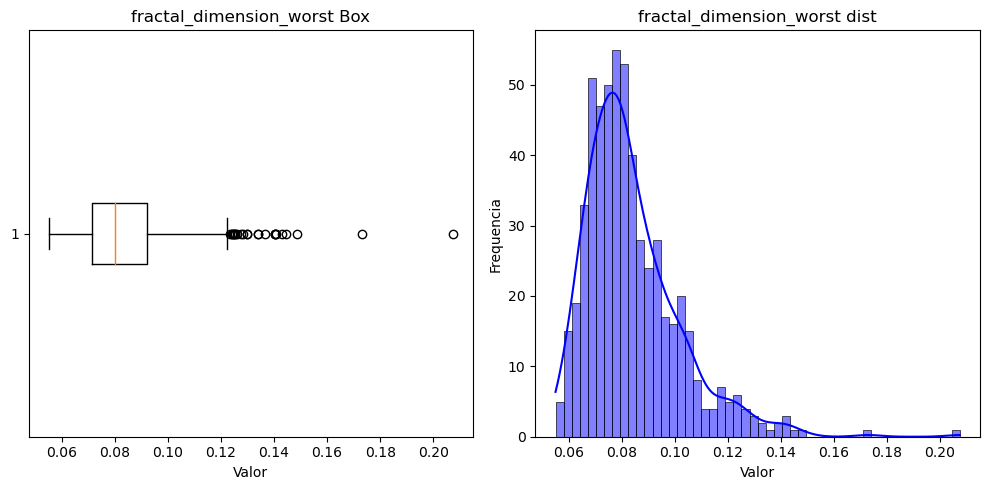

In [9]:
for coluna in colunas:
    if df[coluna].dtype == 'float64':
        fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))

        ax_box.boxplot(df[coluna], vert=False, whis=1.5)
        ax_box.set_xlabel('Valor')
        ax_box.set_title(f'{coluna} Box')

        sns.histplot(df[coluna], bins=50, color='blue', kde=True, ax=ax_hist)
        ax_hist.set_xlabel('Valor')
        ax_hist.set_ylabel('Frequencia')
        ax_hist.set_title(f'{coluna} dist')

        # Show plot
        plt.tight_layout()
        plt.show()

Analisando os gráficos acima confirmamos a presença de outliers porem, se tratando de uma variáveis continuas e análisando cada uma podemos perceber que nao existe nenhum outlier realmente que seja discrepante dos demais.  Sendo assim vamos manter esses dados.

## Tratamento e escalonamento dos dados

In [10]:
df.diagnosis.replace({'M': 1, 'B': 0}, inplace=True)

Transformando a variável em inteiro sendo:
- 1 = Maligno
- 0 = Benigno

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Dividindo em previsores e alvo

In [12]:
alvo = df.diagnosis.values
alvo

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [13]:
previsores = df.drop(columns='diagnosis').values
previsores

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [14]:
alvo.shape, previsores.shape

((569,), (569, 30))

### Análise da escala das variáveis

In [15]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
previsores_escalonados = StandardScaler().fit_transform(previsores)

In [17]:
previsores_escalonados

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [18]:
df_alvo = pd.DataFrame(alvo)
df_alvo.to_csv('/home/lucasqueiros/DataScience/Projeto-Classificacao/data/processed/alvo.csv', sep=',', encoding='utf-8')

In [19]:
df_previsores = pd.DataFrame(previsores)
df_previsores.to_csv('/home/lucasqueiros/DataScience/Projeto-Classificacao/data/processed/previsores.csv', sep=',', encoding='utf-8')

In [20]:
df_previsores_escalonados = pd.DataFrame(previsores_escalonados)
df_previsores_escalonados.to_csv('/home/lucasqueiros/DataScience/Projeto-Classificacao/data/processed/previsores_escalonados.csv', sep=',', encoding='utf-8')

### Dividindo dados entre Treino e Teste

In [29]:
previsores_treino, previsores_teste, alvo_treino, alvo_teste = train_test_split(previsores, alvo, test_size = 0.3, random_state = 42)
previsores_escalonados_treino, previsores_escalonados_teste, alvo_treino, alvo_teste = train_test_split(previsores, alvo, test_size = 0.3, random_state = 42)

In [33]:
df_alvo = pd.DataFrame(alvo_treino)
df_alvo.to_csv('/home/lucasqueiros/DataScience/Projeto-Classificacao/data/processed/Y_treino.csv', sep=',', encoding='utf-8')
df_alvo = pd.DataFrame(alvo_teste)
df_alvo.to_csv('/home/lucasqueiros/DataScience/Projeto-Classificacao/data/processed/Y_teste.csv', sep=',', encoding='utf-8')

In [34]:
df_previsores = pd.DataFrame(previsores_treino)
df_previsores.to_csv('/home/lucasqueiros/DataScience/Projeto-Classificacao/data/processed/X_treino.csv', sep=',', encoding='utf-8')
df_previsores = pd.DataFrame(previsores_teste)
df_previsores.to_csv('/home/lucasqueiros/DataScience/Projeto-Classificacao/data/processed/X_teste.csv', sep=',', encoding='utf-8')

In [35]:
df_previsores_escalonados = pd.DataFrame(previsores_escalonados_treino)
df_previsores_escalonados.to_csv('/home/lucasqueiros/DataScience/Projeto-Classificacao/data/processed/X_esc_treino.csv', sep=',', encoding='utf-8')
df_previsores_escalonados = pd.DataFrame(previsores_escalonados_teste)
df_previsores_escalonados.to_csv('/home/lucasqueiros/DataScience/Projeto-Classificacao/data/processed/X_esc_teste.csv', sep=',', encoding='utf-8')